# Movie Rating Prediction

### Data Extarction

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [103]:
df=pd.read_csv("IMDB_ratings.csv",encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### Data Preprocessing

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [105]:
print("Shape of the DataSet :", df.shape)
print("Checking Null Values :", df.isnull().sum())
print("Checking any duplicated row :" ,df.duplicated().sum())

Shape of the DataSet : (15509, 10)
Checking Null Values : Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
Checking any duplicated row : 6


In [106]:
df.dropna(inplace=True,axis=0)
df.shape

(5659, 10)

In [107]:
df.nunique()

Name        5385
Year          91
Duration     174
Genre        376
Rating        83
Votes       2027
Director    2431
Actor 1     1960
Actor 2     2321
Actor 3     2556
dtype: int64

You may notice that year and votes contain some especial symbol that makes the columns data as object lets convert them to interger

In [108]:
df['Year'] = df['Year'].str.replace('(','')
df['Year'] = df['Year'].str.replace(')','').astype(int)


In [109]:
df['Votes'] = df['Votes'].str.replace(',','').astype(int)

# EDA

+ <b>Lets see the distribution of all the Columns</b>

Text(0.5, 1.0, 'Top 10 Main Actors')

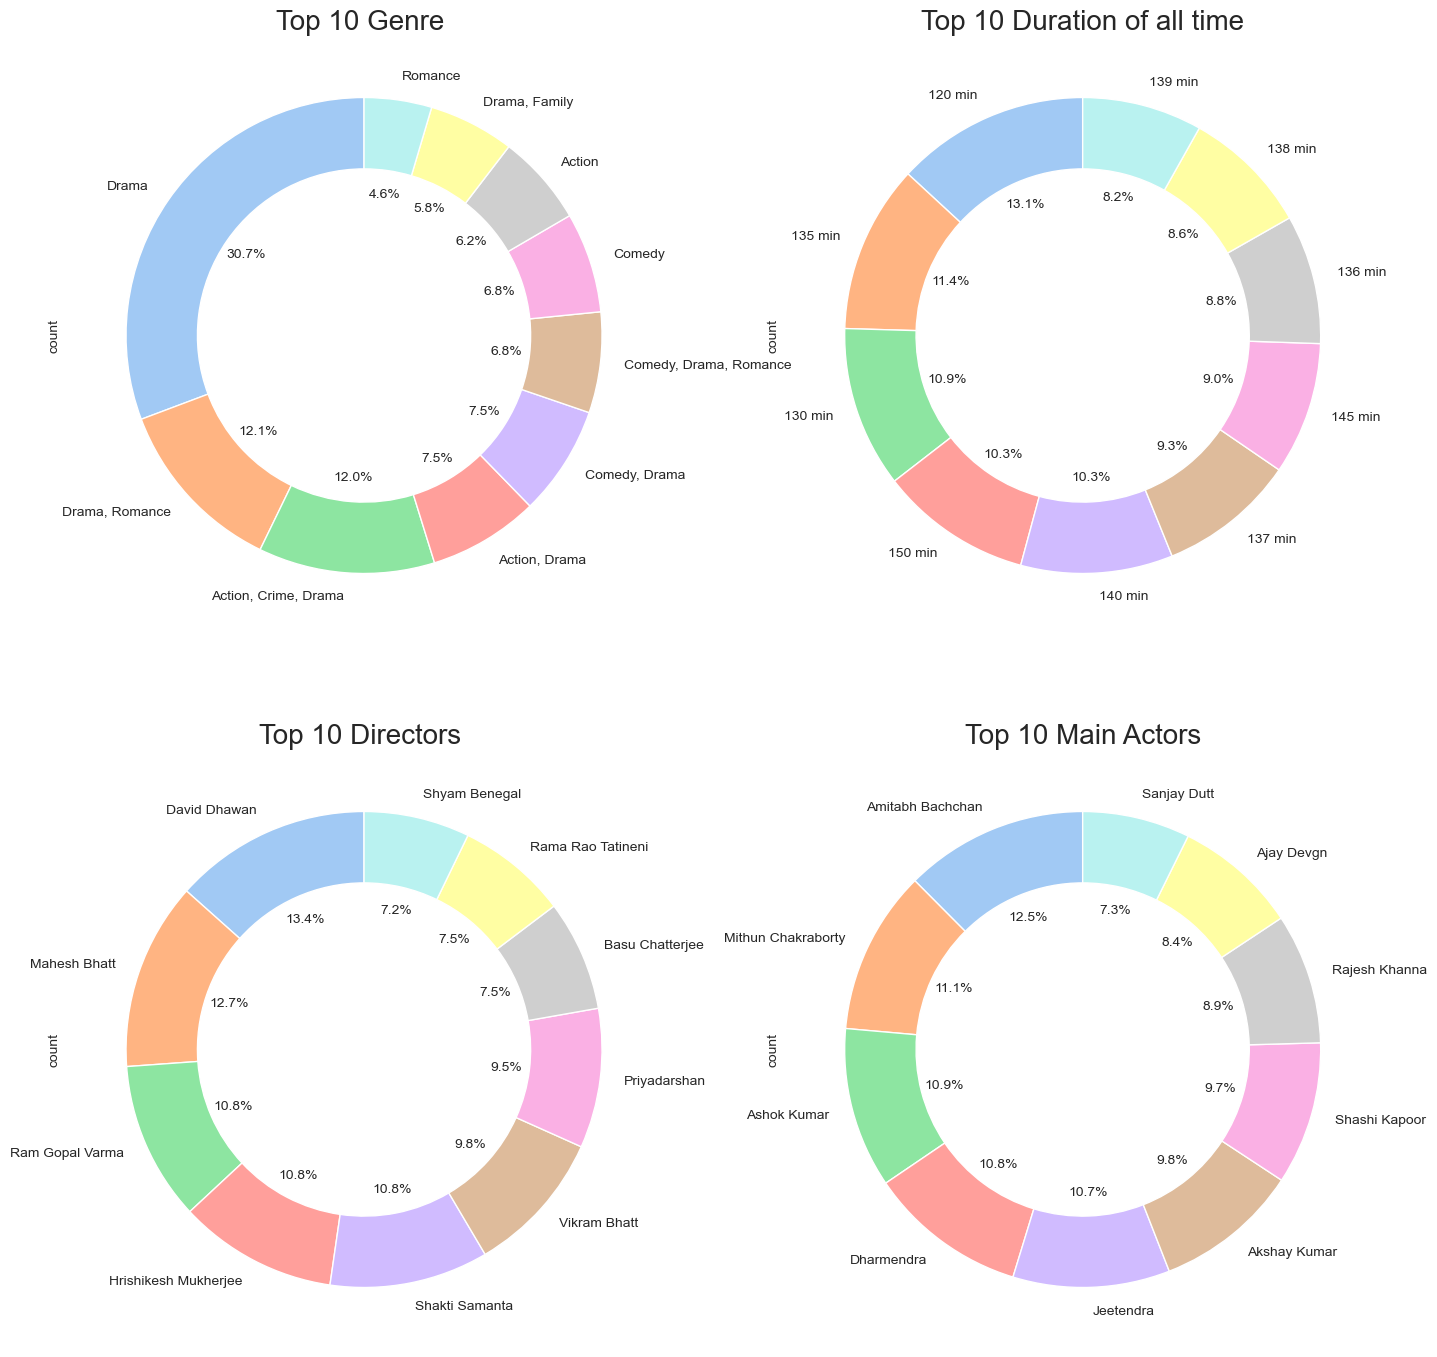

In [112]:
fig = plt.figure()
ax0=fig.add_subplot(2, 2, 1)
ax1=fig.add_subplot(2, 2, 2)
ax2=fig.add_subplot(2, 2, 3)
ax3=fig.add_subplot(2, 2, 4)
df['Genre'].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90,
                                            colors=sns.color_palette('pastel'),figsize=(17, 17), wedgeprops=dict(width=0.3),ax=ax0)
ax0.set_title('Top 10 Genre ',fontsize = 20)

df['Duration'].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90,
                                            colors=sns.color_palette('pastel'),figsize=(17, 17), wedgeprops=dict(width=0.3),ax=ax1)
ax1.set_title('Top 10 Duration of all time',fontsize = 20)


df['Director'].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90,
                                            colors=sns.color_palette('pastel'),figsize=(17, 17), wedgeprops=dict(width=0.3),ax=ax2)
ax2.set_title('Top 10 Directors ',fontsize = 20)


df['Actor 1'].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90,
                                            colors=sns.color_palette('pastel'),figsize=(17, 17), wedgeprops=dict(width=0.3),ax=ax3)
ax3.set_title('Top 10 Main Actors',fontsize =20)

+ <b>Lets count numbers of movies made per year</b>

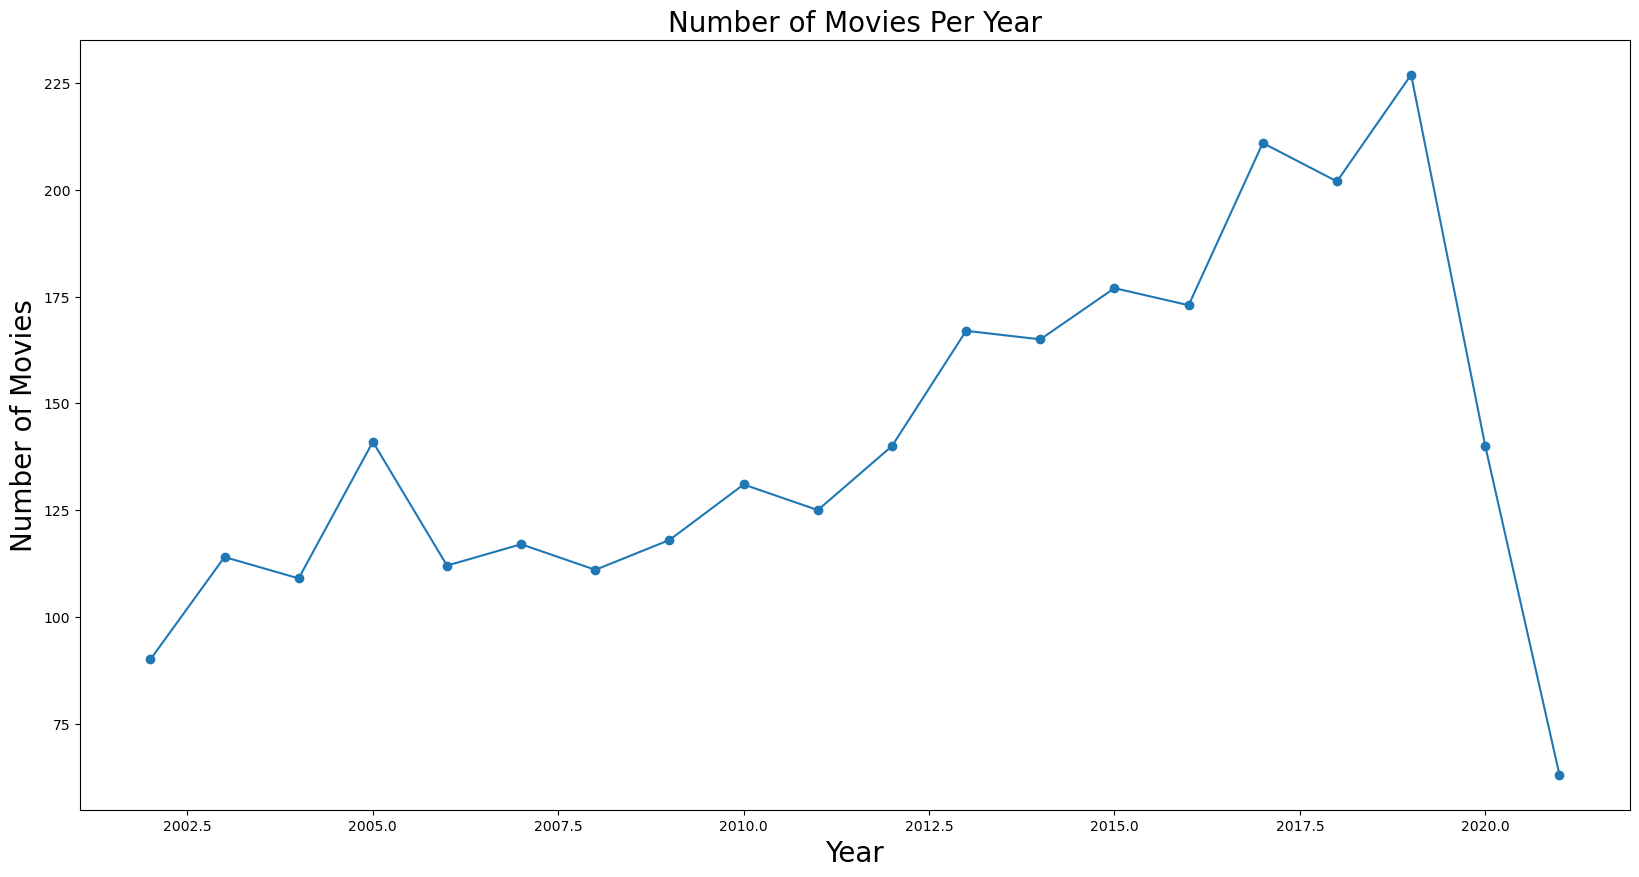

In [10]:
plt.figure(figsize=(20, 10))

year_counts = df['Year'].value_counts().sort_index().tail(20)
years = year_counts.index

plt.plot(years, year_counts, marker='o' )

plt.title('Number of Movies Per Year',fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Number of Movies',fontsize = 20)


plt.show()

In [11]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [12]:
df.Year.value_counts().head(10)

Year
2019    227
2017    211
2018    202
2015    177
2016    173
2013    167
2014    165
2005    141
2012    140
2020    140
Name: count, dtype: int64

+ <b>Lets count the top 10 genres</b>

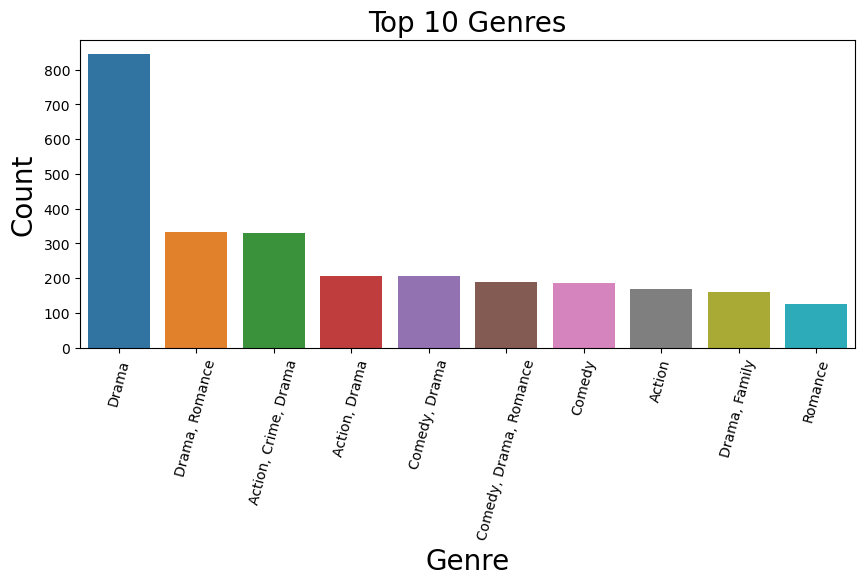

In [13]:
genre=df['Genre'].value_counts().reset_index()
genre.sort_values(by='count',ascending=False,inplace=True)
genre=genre.head(10)
plt.figure(figsize=(10,4))
sns.barplot(data=genre,x='Genre',y='count')
plt.xticks(rotation=75)
plt.xlabel("Genre", fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.title("Top 10 Genres",fontsize = 20)
plt.show()

+ <b>Lets see the top ten genres with highest ratings and votes</b>

In [14]:
high_rating=df.groupby('Genre')['Rating'].mean().reset_index()

most_votes=df.groupby('Genre')['Votes'].mean().reset_index()

In [15]:
high_rating=high_rating.sort_values(by='Rating', ascending = False)
high_rating=high_rating[0:10]

most_votes=most_votes.sort_values(by='Votes', ascending = False)
most_votes=most_votes[0:10]

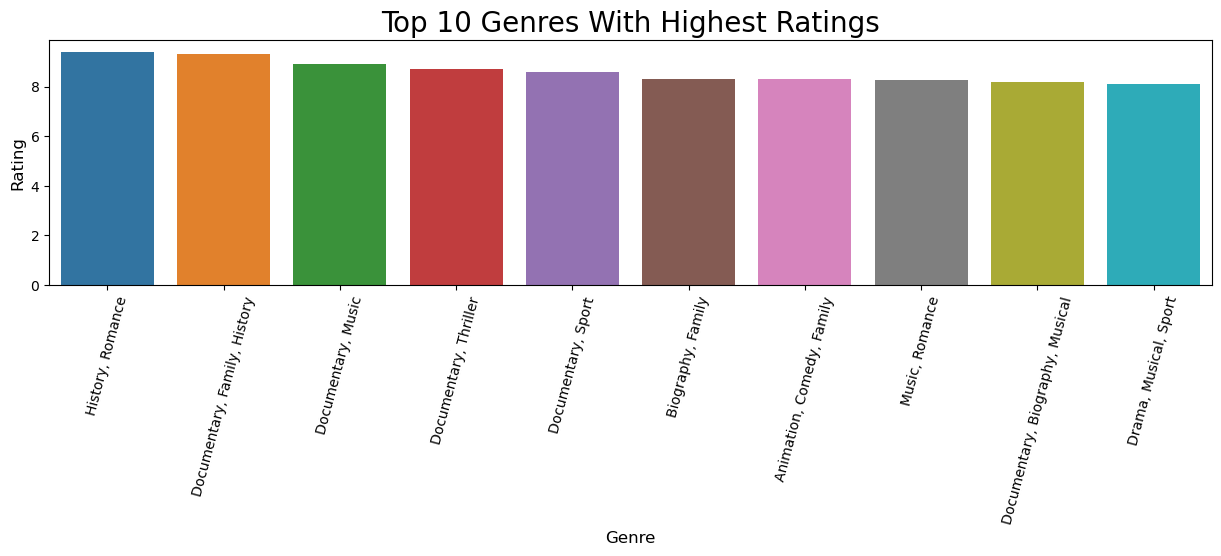

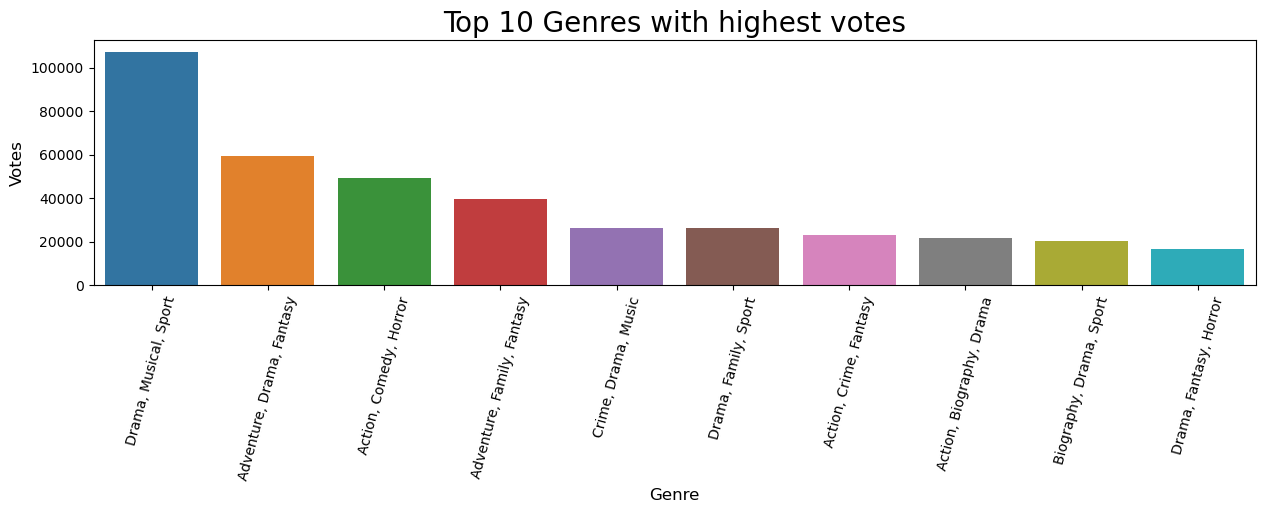

In [16]:
plt.figure(figsize=(15,7))

plt.subplot(2, 1, 1)

sns.barplot(data=high_rating,x='Genre',y='Rating')
plt.xticks(rotation = 75)
plt.xlabel("Genre",fontsize = 12)
plt.ylabel("Rating",fontsize = 12)
plt.title("Top 10 Genres With Highest Ratings",fontsize = 20)
plt.show()

plt.figure(figsize=(15,7))

plt.subplot(2, 1, 2)
# plt.figure(figsize=(10,5))
sns.barplot(data=most_votes,x='Genre',y='Votes')
plt.xticks(rotation = 75)
plt.xlabel("Genre",fontsize = 12)
plt.ylabel("Votes",fontsize = 12)
plt.title("Top 10 Genres with highest votes",fontsize = 20)
plt.show()




+ <b>Lets see the top 10 Director with highest Ratings and Votes</b>

In [17]:
direc_ratings=df.groupby('Director')['Rating'].mean().reset_index()

direc_votes=df.groupby('Director')['Votes'].sum().reset_index()

In [18]:
direc_ratings.sort_values(by='Rating',ascending=False,inplace=True)
direc_ratings=direc_ratings[0:10]

direc_votes.sort_values(by='Votes',ascending=False,inplace=True)
direc_votes=direc_votes[0:10]

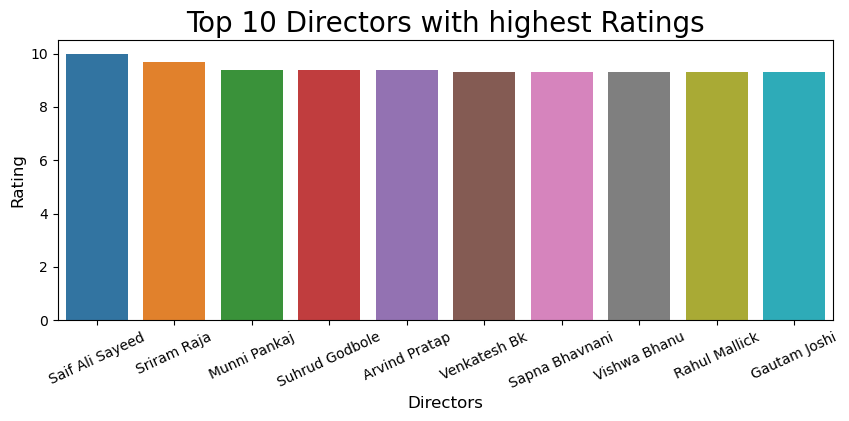

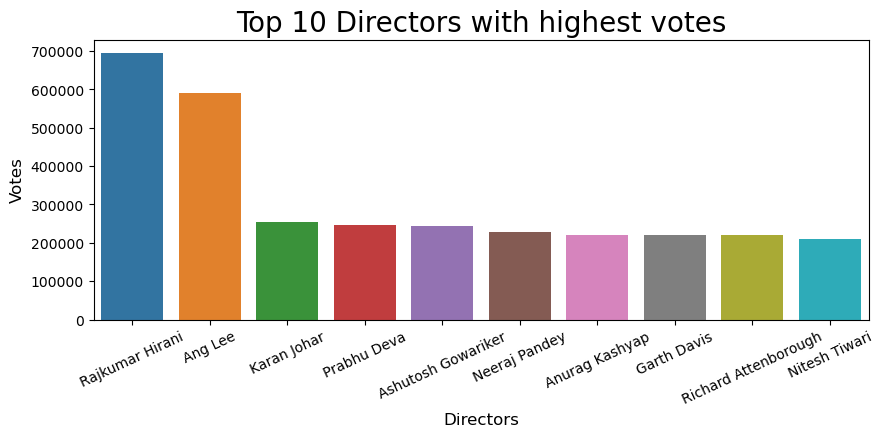

In [19]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
sns.barplot(data=direc_ratings,x='Director',y='Rating')
plt.xticks(rotation=25)
plt.xlabel("Directors",fontsize = 12)
plt.ylabel("Rating",fontsize = 12)
plt.title("Top 10 Directors with highest Ratings",fontsize = 20)
plt.show()

plt.figure(figsize=(10,8))
plt.subplot(2,1,2)
sns.barplot(data=direc_votes,x='Director',y='Votes')
plt.xticks(rotation=25)
plt.xlabel("Directors",fontsize = 12)
plt.ylabel("Votes",fontsize = 12)
plt.title("Top 10 Directors with highest votes",fontsize = 20)
plt.show()

+ <b>Lets see the distribution of Ratings</b>

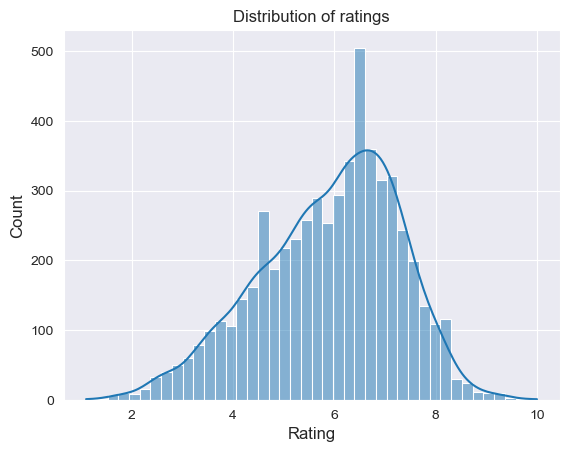

In [20]:
sns.set_style("darkgrid")
sns.histplot(data=df,x="Rating",kde=True)
plt.title('Distribution of ratings')
plt.xlabel("Rating",fontsize = 12)
plt.ylabel("Count",fontsize = 12)
plt.show()

### Feature Engineering

+ Creating a new column with average values of director's rating

In [21]:
direct_avg_rating={}
for index, row in df.iterrows():
    rating=row['Rating']
    director=row['Director']
    if director in direct_avg_rating:
        direct_avg_rating[director]['sum']+=rating
        direct_avg_rating[director]['count']+=1
    else:
        direct_avg_rating[director]={'sum':rating,'count':1}
        
df['Director_avg_rating']=df['Director'].apply(lambda x: direct_avg_rating[x]['sum']/direct_avg_rating[x]['count'])

+ Creating a new column with average values of main Actor's rating

In [22]:
actor1_avg_rating={}
for index,row in df.iterrows():
    ratings=row['Rating']
    actor=row['Actor 1']
    if actor in actor1_avg_rating:
        actor1_avg_rating[actor]['sum']+=rating
        actor1_avg_rating[actor]['count']+=1
    else:
        actor1_avg_rating[actor]={'sum':rating,'count':1}
def calculate_actor_avg(row):
    actors=row['Actor 1'].split(',')
    lead_actor_ratings = [actor1_avg_rating[actor]['sum'] / actor1_avg_rating[actor]['count'] for actor in actors]
    return max(lead_actor_ratings)


df['Lead Actor Average Rating'] = df.apply(calculate_actor_avg, axis=1)

+ Splitting the genre and creating new columns

In [23]:
df['Genre1'] = df.Genre.str.split(',',expand=True)[0]
df['Genre2'] = df.Genre.str.split(',',expand=True)[1]
df['Genre3'] = df.Genre.str.split(',',expand=True)[2]

In [24]:
# dropping unwanted columns
df = df.drop(columns=['Genre','Director','Actor 1','Actor 2','Actor 3','Duration','Name'])

In [25]:
df.shape[0]

5659

In [26]:
print(df.shape)
print(df.isna().sum())
df = df.fillna(0)

for i in df.index:
    if df.at[i, 'Genre2'] == 0:
        df.at[i, 'Genre2'] = df.at[i, 'Genre1']
    elif df.at[i, 'Genre3'] == 0:
        df.at[i, 'Genre3'] = df.at[i, 'Genre2']
print(df.isna().sum())

(5659, 8)
Year                            0
Rating                          0
Votes                           0
Director_avg_rating             0
Lead Actor Average Rating       0
Genre1                          0
Genre2                       1658
Genre3                       3340
dtype: int64
Year                         0
Rating                       0
Votes                        0
Director_avg_rating          0
Lead Actor Average Rating    0
Genre1                       0
Genre2                       0
Genre3                       0
dtype: int64


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5659 non-null   int32  
 1   Rating                     5659 non-null   float64
 2   Votes                      5659 non-null   int32  
 3   Director_avg_rating        5659 non-null   float64
 4   Lead Actor Average Rating  5659 non-null   float64
 5   Genre1                     5659 non-null   object 
 6   Genre2                     5659 non-null   object 
 7   Genre3                     5659 non-null   object 
dtypes: float64(3), int32(2), object(3)
memory usage: 482.7+ KB


In [28]:
for col in ['Genre1', 'Genre2', 'Genre3']:
    df[col], _ = pd.factorize(df[col])

df.head()

,Year,Rating,Votes,Director_avg_rating,Lead Actor Average Rating,Genre1,Genre2,Genre3
1,2019,7.0,8,7.000000,6.2,0,0,0
3,2019,4.4,35,4.400000,6.2,1,1,1
5,1997,4.7,827,5.313333,6.2,1,2,2
6,2005,7.4,1086,7.383333,6.2,0,1,3
8,2012,5.6,326,5.600000,6.2,2,3,4


### Machine learning

In [29]:
target='Rating'
X=df.drop(columns=['Rating'])
y=df['Rating']

In [30]:
# scaling the columns
X=preprocessing.StandardScaler().fit_transform(X)

In [83]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print("Training set:", X_train.shape)
print("test ste", X_test.shape)

Training set: (4527, 7)
test ste (1132, 7)


#### Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [85]:
yhat=LR.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
LinearRegression_MAE = mean_absolute_error(Y_test,yhat)
print("MAE :" ,LinearRegression_MAE)
LinearRegression_MSE = mean_squared_error(Y_test,yhat)
print("MSE:", LinearRegression_MSE)
LinearRegression_R2 = r2_score(Y_test,yhat)
print("R^2 :",LinearRegression_R2)

MAE : 0.5383058399431074
MSE: 0.6205489788648291
R^2 : 0.6700267494165346


#### Polynomial Regression

In [87]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomail features with degree two
pr=PolynomialFeatures(degree=3)
pr

x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.fit_transform(X_test)
pr

PolynomialFeatures(degree=3)

In [88]:
poly = LinearRegression()
poly.fit(x_train_pr, Y_train)

LinearRegression()

In [89]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([6.94171259, 6.19801276, 5.14840852, 5.14760826, 5.5703248 ])

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
POLY_MAE = mean_absolute_error(Y_test,yhat)
print("MAE :",POLY_MAE)
POLY_MSE = mean_squared_error(Y_test,yhat)
print("MSE :",POLY_MSE)
POLY_R2 = r2_score(Y_test,yhat)
print("R^2",POLY_R2)

MAE : 0.5526709225587012
MSE : 0.6443242839127069
R^2 0.657384371526214


In [91]:
poly.score(x_train_pr, Y_train)

0.6980296277022737

In [92]:
poly_accuracy_score=poly.score(x_test_pr, Y_test)
poly_accuracy_score

0.657384371526214

+ <b>Lets check best value of polynimial feature's Degree</b>

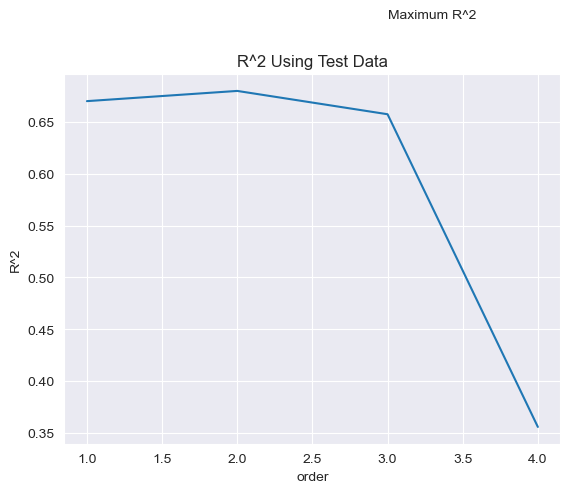

In [93]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(X_train)
    
    x_test_pr = pr.fit_transform(X_test)    
    
    LR.fit(x_train_pr, Y_train)
    
    Rsqu_test.append(LR.score(x_test_pr, Y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')
plt.show()

AS we can see that best value of degree is 2



+ <b>Now lest plot the distribution plot between training data and test data.</b>

In [94]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

C:\Users\SB INFO\AppData\Local\Temp\ipykernel_16644\483544288.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\SB INFO\AppData\Local\Temp\ipykernel_16644\483544288.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = 

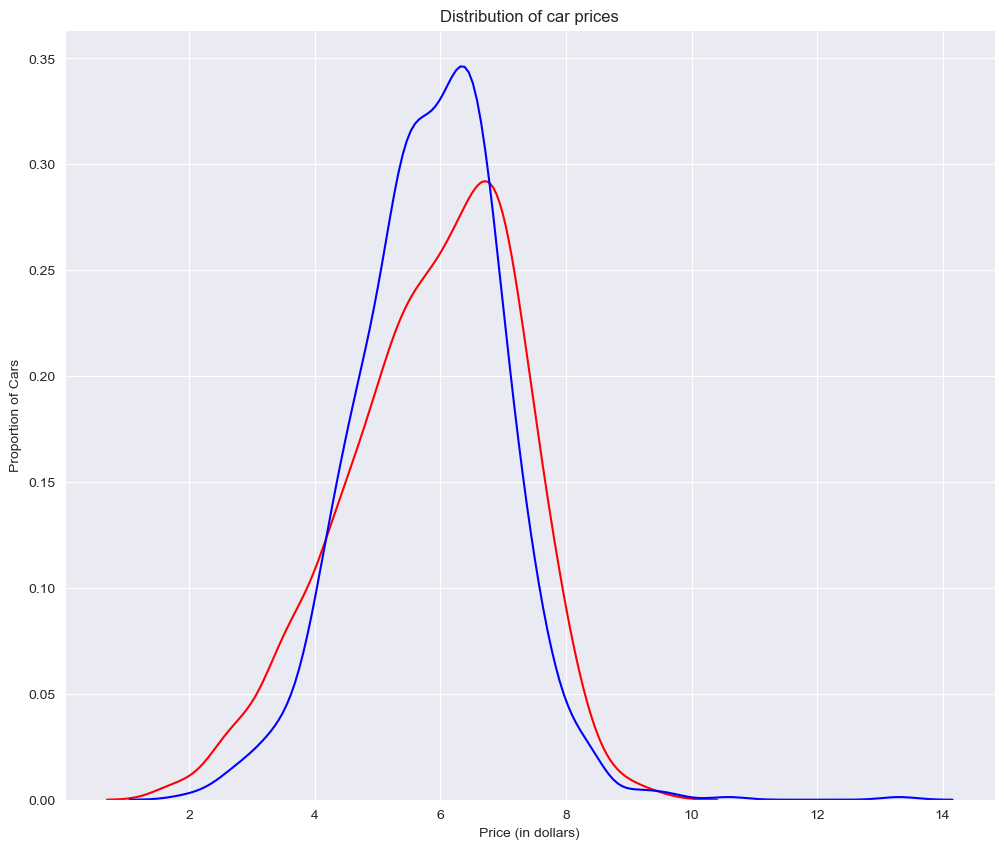

In [95]:
yhat2_test=LR.predict(x_test_pr)
DistributionPlot(Y_test,yhat,"Actual values","Predicted vaues","Distribution of car prices")

#### Ridge Regression

In [96]:
pr=PolynomialFeatures(degree=3)
x_train_pr=pr.fit_transform(X_train)
x_test_pr=pr.fit_transform(X_test)

from sklearn.linear_model import Ridge

RigeModel=Ridge(alpha=21)

RigeModel.fit(x_train_pr, Y_train)

yhat = RigeModel.predict(x_test_pr)

print('predicted:', yhat[0:4])
print('test set :', Y_test[0:4].values)

predicted: [6.91876145 6.15260792 5.14393466 5.19448098]
test set : [6.6 5.9 4.7 6.2]


In [97]:
ridge_Accuracy_Score=RigeModel.score(x_test_pr,Y_test)
ridge_Accuracy_Score

0.6865142806704718

In [98]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, Y_train)
    test_score, train_score = RigeModel.score(x_test_pr, Y_test), RigeModel.score(x_train_pr, Y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|█████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.38it/s, Test Score=0.525, Train Score=0.535]


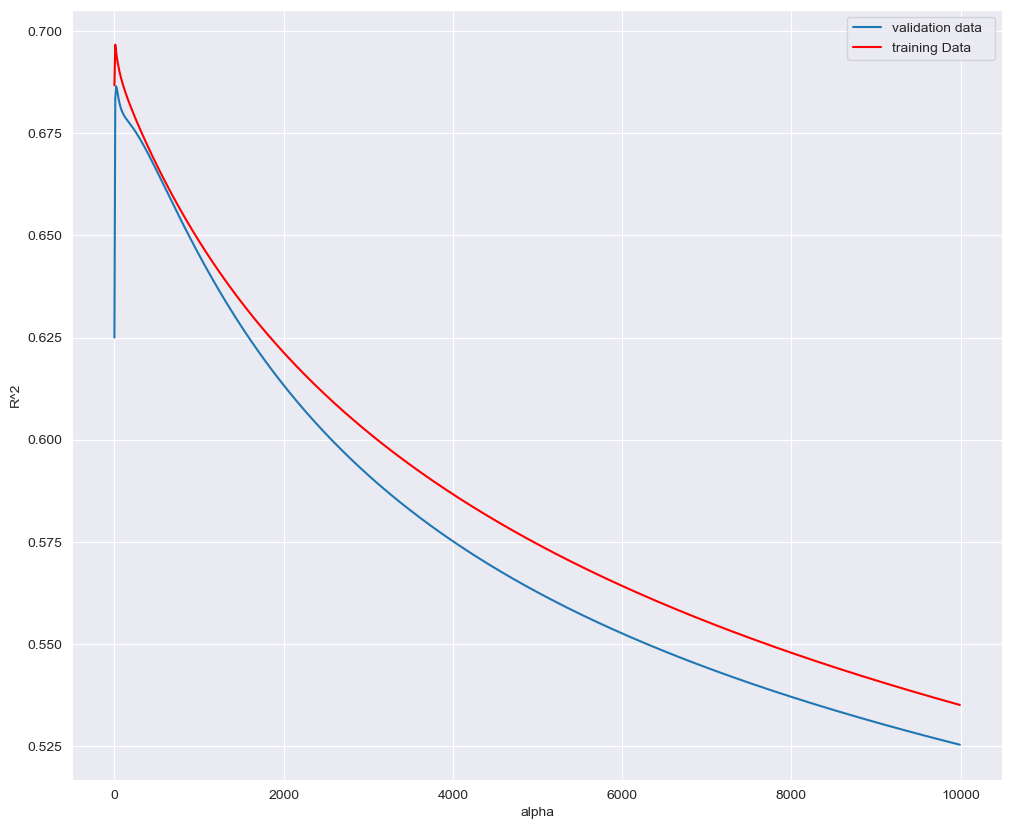

In [99]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

   Linear Regression  Polynomial Features  Ridge Regression
1           0.670027             0.657384          0.686514
Higher prediction is from Decison Tree


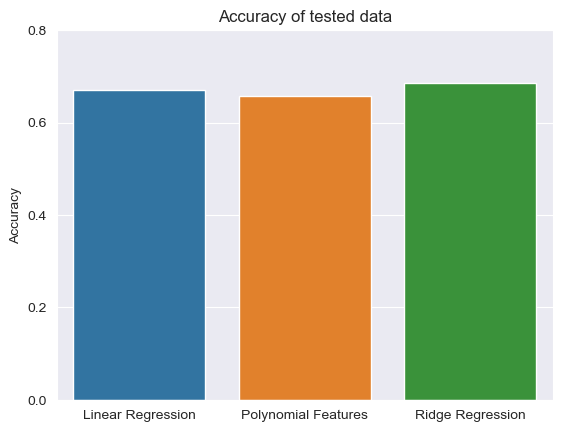

In [100]:
Accuracy=pd.DataFrame({'Linear Regression':LinearRegression_R2,'Polynomial Features':poly_accuracy_score,
                       'Ridge Regression':ridge_Accuracy_Score},index=[1])
import seaborn as sns
sns.barplot(data=Accuracy)
plt.ylabel("Accuracy")
plt.title("Accuracy of tested data")

plt.yticks(np.arange(0.0, 1,0.2 ))
print(Accuracy)
print('Higher prediction is from Decison Tree')
